In [1]:
import regex
import string
from nltk.corpus import wordnet

import numpy as np
import pandas as pd
from utils.contractions import contractions_dict
from joblib import Parallel, delayed

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from utils.timer import Timer
import regex

In [2]:
import os
os.getcwd()

'/home/yiyi/Documents/masterthesis/CPD/lstm_sentiment_analysis'

In [3]:
import utils.preprocess as preprocess

In [4]:
filepath='/home/yiyi/Documents/masterthesis/CPD/data/cleand_query_output_csv/0#f116f785-8626-48f3-a390-c0c4a03b5bd6'

- Hilton miami downtown
- 2018-01-17T16:25:00+02:00
- 527 rooms
- 35 million renovation
- mammoth shopping complex, movie theater , 
- guest rooms, meeting space, restuarant, lobby, loading dock, park ,

In [5]:
uids, lemmas, sents, dates, scores= preprocess.get_data(filepath)

Elapsed time: 11.4137 seconds


In [6]:
sents[:10]

['i attended metrocon   and they used this hotel and the convention center as their mainstay ',
 'checkin was effortless  the rooms were homey and the beds were amazing ',
 'we never used room service ',
 'the breakfast that comes with the room is massive and perfect for a convention attendee to fuel up ',
 'the only thing i hated about this hotel was the fact that the elevators were slow ',
 'they had pass you even if it had only one person on it ',
 'there was a gymnastic competition also sharing the hotel  and a wedding ',
 'so that made getting up and down via elevator take about   minutes or more ',
 'you are lucky if it took you less than  minutes to get down from your room ',
 'other than that  i had a lovely stay ']

In [7]:
uids[:10]

['fcd73d28-e81c-4486-81b5-5ebee63a2946',
 'fcd73d28-e81c-4486-81b5-5ebee63a2946',
 'fcd73d28-e81c-4486-81b5-5ebee63a2946',
 'fcd73d28-e81c-4486-81b5-5ebee63a2946',
 'fcd73d28-e81c-4486-81b5-5ebee63a2946',
 'fcd73d28-e81c-4486-81b5-5ebee63a2946',
 'fcd73d28-e81c-4486-81b5-5ebee63a2946',
 'fcd73d28-e81c-4486-81b5-5ebee63a2946',
 'fcd73d28-e81c-4486-81b5-5ebee63a2946',
 'fcd73d28-e81c-4486-81b5-5ebee63a2946']

In [8]:
sents_ =[]
for sent in sents:
    s = regex.sub(' +', ' ', sent).strip()
    sents_.append(s)

In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [10]:
sent = sents_[2]

In [11]:
sent

'we never used room service'

In [ ]:
for sent in sents_[:10]:
    doc = nlp(sent)
    for word in doc:
        print(word.text, word.dep_)
    print('-------')

In [18]:
import plac
import random
import pathlib
import cytoolz
import numpy
from keras.models import Sequential, model_from_json
from keras.layers import LSTM, Dense, Embedding, Bidirectional
from keras.layers import TimeDistributed
from keras.optimizers import Adam
import thinc.extra.datasets
from spacy.compat import pickle
import spacy
import pandas as pd

Using TensorFlow backend.


In [19]:
from keras_spacy_SA import *

In [20]:
from itertools import chain

In [32]:
texts = ["the pool was really fantastic and i can not stress enough how much we all enjoyed it",
        "our stay at the hilton in downtown miami was hell from day one"]

In [21]:
nlp = spacy.load("en_vectors_web_lg")
nlp.add_pipe(nlp.create_pipe("sentencizer"))

##### Applying Sentiment Analyser
nlp.add_pipe(SentimentAnalyser.load('lstm_model/', nlp, max_length=128))


In [22]:
##### Getting the Polarity Score
# "docs" is a list which contains sentences we want to classify
sentiments = []
for doc in nlp.pipe(sents_):
    sentiments.append(doc.sentiment)

In [23]:
sent_df = pd.DataFrame(zip(uids, lemmas, sents_, sentiments, dates, scores), columns=['uid','lemma', 'sentence', 'sentiment', 'date', 'score' ])

In [24]:
pd.set_option('display.max_columns',15)
pd.set_option('display.width', 100)

In [25]:
sent_df.head()

,uid,lemma,sentence,sentiment,date,score
0,fcd73d28-e81c-4486-81b5-5ebee63a2946,attended metrocon used hotel convention center...,i attended metrocon and they used this hotel a...,0.489639,2008-05-01 00:00:00,100
1,fcd73d28-e81c-4486-81b5-5ebee63a2946,effortless room homey bed amazing,checkin was effortless the rooms were homey an...,0.499968,2008-05-01 00:00:00,100
2,fcd73d28-e81c-4486-81b5-5ebee63a2946,never used room service,we never used room service,0.062981,2008-05-01 00:00:00,100
3,fcd73d28-e81c-4486-81b5-5ebee63a2946,breakfast come room massive perfect convention...,the breakfast that comes with the room is mass...,0.487099,2008-05-01 00:00:00,100
4,fcd73d28-e81c-4486-81b5-5ebee63a2946,thing hated hotel fact elevator slow,the only thing i hated about this hotel was th...,-0.436162,2008-05-01 00:00:00,100


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


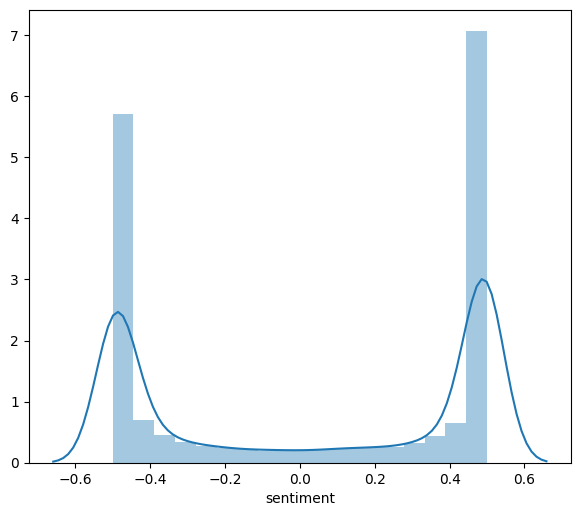

In [27]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot(sent_df['sentiment'])

In [28]:
for sent, sentiment, score, date in zip(sent_df.sentence, sent_df.sentiment, sent_df.score, sent_df.date):
    try:
        if sentiment >0.4 and score <50:
            print(sent, sentiment, score, date)
    except Exception:
        print('*'*20)
        print(sent, sentiment, score, date)

i stayed at the embassy suites for a convention 0.49157142639160156 40.0 2007-03-30 00:00:00
the rooms are really spacious decorated very well and have a refrigerator microwave and bar area 0.49986064434051514 40.0 2007-03-30 00:00:00
the pool is nice and the workout room has good treadmills xtrainers and a bike 0.4997789263725281 40.0 2007-03-30 00:00:00
ok onto the negatives 0.49161314964294434 40.0 2007-03-30 00:00:00
we had a great time 0.40796196460723877 20.0 2007-05-17 00:00:00
i stayed at this hotel because it is a reputable establishmentnnworst customer service i have ever experienced in the hotel industry 0.4929736852645874 20.0 2007-12-05 00:00:00
finally after days i called myself to follow up 0.42947620153427124 20.0 2007-12-05 00:00:00
great bargain beautiful new hotel at a great price 0.4996544122695923 20.0 2008-06-09 00:00:00
great value outstanding breakfast selection 0.49977558851242065 20.0 2007-12-31 00:00:00
i actually stayed at this hotel for approximately months

In [29]:
topic_room = []
topic_park = []
topic_meeting =[]
topic_restaurant = []
topic_lobby = []
topic_loading = []
topic_renovat = []

for sent in sent_df['sentence']:
    if 'room' in sent:
        topic_room.append(1)
    else:
        topic_room.append(0)
        
    if 'park' in sent:
        topic_park.append(1)
    else:
        topic_park.append(0)
        
    if 'meeting' in sent:
        topic_meeting.append(1)
    else:
        topic_meeting.append(0)
    
    
    if 'restaurant' in sent:
        topic_restaurant.append(1)
    else:
        topic_restaurant.append(0)
    
     
    if 'lobby' in sent:
        topic_lobby.append(1)
    else:
        topic_lobby.append(0)
    
    if 'loading' in sent:
        topic_loading.append(1)
    else:
        topic_loading.append(0)
        
    if 'renovat' in sent or 'refresh' in sent:
        topic_renovat.append(1)
    else:
        topic_renovat.append(0)
          

In [30]:
sent_df['topic_room'] = topic_room
sent_df['topic_park'] = topic_park
sent_df['topic_meeting'] = topic_meeting
sent_df['topic_restaurant'] = topic_restaurant
sent_df['topic_lobby'] = topic_lobby
sent_df['topic_loading'] = topic_loading
sent_df['topic_renovat'] = topic_renovat

In [31]:
sent_df.head(2)

,uid,lemma,sentence,sentiment,date,score,topic_room,topic_park,topic_meeting,topic_restaurant,topic_lobby,topic_loading,topic_renovat
0,fcd73d28-e81c-4486-81b5-5ebee63a2946,attended metrocon used hotel convention center...,i attended metrocon and they used this hotel a...,0.489639,2008-05-01 00:00:00,100,0,0,0,0,0,0,0
1,fcd73d28-e81c-4486-81b5-5ebee63a2946,effortless room homey bed amazing,checkin was effortless the rooms were homey an...,0.499968,2008-05-01 00:00:00,100,1,0,0,0,0,0,0


In [43]:
sent_df.to_csv('test.csv')

# meeting and renovation

In [90]:
meeting_related = sent_df[sent_df['topic_meeting']==1][sent_df['topic_renovat']==1]

/home/yiyi/anaconda3/envs/cpd/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [91]:
len(meeting_related)

6

In [93]:
meeting_related.

3908     excellent staff great job with new renovations...
14721    good downtown location with good service neded...
15842    lobby and meeting rooms are nice but the rooms...
26561    i understand they are renovating some rooms an...
28974    nice hotel undergoing renovations busines meet...
29075    it is understandable that renovations will cau...
Name: sentence, dtype: object

# room topic and renovation

In [32]:
room_related = sent_df[sent_df['topic_room']==1][sent_df['topic_renovat']==1]

/home/yiyi/anaconda3/envs/cpd/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [33]:
len(room_related)

88

In [34]:
sentiments_room = np.array(room_related['sentiment'])

In [35]:
score_corrected = np.array(room_related['sentiment']+room_related['score']*0.1)

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f40fc0bed90>])

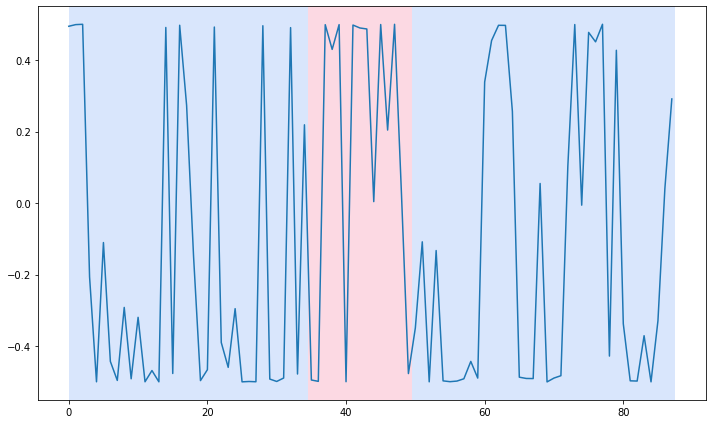

In [38]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt
# creation of data

model='rbf'
n_samples = sentiments_room.shape[0]
algo = rpt.Window(width=20, model=model).fit(sentiments_room)
my_bkps= algo.predict(n_bkps=5)
rpt.show.display(sentiments_room, my_bkps, figsize=(10,6))

In [41]:
room_related.iloc[60,:]

uid                  6d20fa70-700e-4838-8eb8-d1c7c7d9d6f5
lemma                      stayed recently renovated room
sentence            i stayed in a recently renovated room
sentiment                                        0.338514
date                                  2019-01-23 00:00:00
score                                                  60
topic_room                                              1
topic_park                                              0
topic_meeting                                           0
topic_restaurant                                        0
topic_lobby                                             0
topic_loading                                           0
topic_renovat                                           1
Name: 38176, dtype: object

In [42]:
room_related.iloc[20,:]

uid                       4d5abdde-9f72-4e44-b075-e3c46a7bd7ed
lemma                                    hotel renovating room
sentence            the hotel was renovating some of the rooms
sentiment                                            -0.465754
date                                       2018-07-13 00:00:00
score                                                      100
topic_room                                                   1
topic_park                                                   0
topic_meeting                                                0
topic_restaurant                                             0
topic_lobby                                                  0
topic_loading                                                0
topic_renovat                                                1
Name: 35174, dtype: object

In [79]:
room_related.iloc[50,:]

lemma                        amazing room desperately need renovation
sentence            it was amazing but the room desperately needs ...
sentiment                                                   0.0536065
date                                              2015-07-05 00:00:00
score                                                              60
topic_room                                                          1
topic_park                                                          0
topic_meeting                                                       0
topic_restaurant                                                    0
topic_lobby                                                         0
topic_loading                                                       0
topic_renovat                                                       1
Name: 23179, dtype: object

In [78]:
room_related.iloc[99,:]

lemma                                 room older needed renovated
sentence            our room was older and needed to be renovated
sentiment                                                -0.47776
date                                          2016-06-22 00:00:00
score                                                          60
topic_room                                                      1
topic_park                                                      0
topic_meeting                                                   0
topic_restaurant                                                0
topic_lobby                                                     0
topic_loading                                                   0
topic_renovat                                                   1
Name: 27512, dtype: object

In [74]:
room_related.iloc[100,:]

lemma                        beautiful newly renovated room
sentence            it was a beautiful newly renovated room
sentiment                                          0.497028
date                                    2016-06-25 00:00:00
score                                                    80
topic_room                                                1
topic_park                                                0
topic_meeting                                             0
topic_restaurant                                          0
topic_lobby                                               0
topic_loading                                             0
topic_renovat                                             1
Name: 27521, dtype: object

In [76]:
room_related.iloc[120,:]

lemma               central everything two renovated corner room nice
sentence            central to everything we had two renovated cor...
sentiment                                                    0.498525
date                                              2016-08-16 00:00:00
score                                                             100
topic_room                                                          1
topic_park                                                          0
topic_meeting                                                       0
topic_restaurant                                                    0
topic_lobby                                                         0
topic_loading                                                       0
topic_renovat                                                       1
Name: 28220, dtype: object

In [59]:
sentiments_room

array([-0.06364995,  0.28369278,  0.49868709,  0.49874699,  0.46943921,
        0.43378699,  0.44644684,  0.49969959,  0.00065464, -0.49656519,
       -0.49280456,  0.49942362, -0.07522646, -0.12357309, -0.39569038,
        0.48668414,  0.14474863, -0.46825275, -0.49546623, -0.39915159,
       -0.39203703, -0.39203703, -0.48551577, -0.39654028, -0.49160868,
       -0.49160868, -0.49296084,  0.49830544, -0.45555431,  0.49742055,
       -0.46368438, -0.13133907, -0.48987776,  0.10395139, -0.21243408,
        0.44410545, -0.21243408, -0.4858321 , -0.39534697, -0.42977095,
       -0.49424231,  0.49454147, -0.49948284,  0.49821895, -0.49603626,
        0.40136778, -0.4978402 , -0.49854478, -0.46655563,  0.14780718,
        0.05360645, -0.47738206, -0.49573082, -0.49742839, -0.37659317,
        0.4964174 , -0.49400461, -0.49815229, -0.48918107, -0.42377743,
        0.0754512 ,  0.4538601 , -0.49061579,  0.49929702, -0.49952525,
       -0.49747887, -0.44587928, -0.4871141 ,  0.20792007, -0.49

In [ ]:
rpt.show.display(sentiments_room, bkps, my_bk)

In [30]:
for sent, sentiment, score, date in zip(sents_, sentiments, scores, dates):
    if sentiment >=0.2 and 'room' in sent and score <50:
        print(sent,sentiment, score, date)

on the bright side the room was nice with a beautiful view of the islands and very comfortable but service like i mention here is very very poor 0.47164827585220337 40.0 2010-06-18 00:00:00
the tv in the room was ancient 0.44547075033187866 20.0 2010-12-18 00:00:00
we finally got to our room which looked nice when we walked in 0.48888856172561646 40.0 2008-09-24 00:00:00
great room for the money first when we arrived our rooms were not ready then when we returned they had given them away 0.48932284116744995 20.0 2009-07-06 00:00:00
the tv in the room was ancient 0.44547075033187866 20.0 2010-12-18 00:00:00
this theme continues into the room 0.4307791590690613 20.0 2008-11-17 00:00:00
the hotel room was clean 0.4981542229652405 20.0 2009-07-22 00:00:00
when i returned my room was ready about minutes before 0.35833144187927246 20.0 2009-07-22 00:00:00
terable housekeeping staff check in was very nice after being in the room for sometime my elderly mother in law reached under the pillow t